In [1]:
from torch.nn import functional as F
import torch

import torch.nn as nn

In [3]:
x = torch.tensor([1,1])
y = x + 0
y[0] = 2
x

tensor([1, 1])

In [8]:
import math
class CLIP(nn.Module):
    def __init__(self,n,d_model):
        super().__init__()
        self.n = n
        self.k = nn.Linear(d_model,d_model)
        self.q = nn.Embedding(n,d_model)
    def forward(self,x):
        k = self.k(x)
        q = self.q.weight.T[None]
        #display(k.shape)
        #display(q.shape)
        att = k @ q * (1.0 / math.sqrt(k.size(-1)))
        att = F.softmax(att, dim=-1)
        return att
clip = CLIP(n = 5 , d_model= 16 )
X = torch.randn(  10,20,16 )
print(clip(X).shape)
print(clip(X))

torch.Size([10, 20, 5])
tensor([[[0.0798, 0.1857, 0.4520, 0.0956, 0.1869],
         [0.1261, 0.2730, 0.2885, 0.1769, 0.1355],
         [0.2971, 0.2034, 0.2027, 0.1712, 0.1257],
         [0.2371, 0.1332, 0.1040, 0.3868, 0.1389],
         [0.3098, 0.0929, 0.1793, 0.1692, 0.2488],
         [0.0754, 0.3011, 0.1105, 0.3558, 0.1572],
         [0.2040, 0.3576, 0.0959, 0.2405, 0.1021],
         [0.1874, 0.2745, 0.2129, 0.1895, 0.1358],
         [0.2159, 0.1453, 0.1661, 0.3519, 0.1208],
         [0.0962, 0.0567, 0.3312, 0.2124, 0.3035],
         [0.3023, 0.0891, 0.1706, 0.1691, 0.2689],
         [0.1635, 0.1471, 0.1132, 0.1859, 0.3904],
         [0.0835, 0.1088, 0.5465, 0.0922, 0.1691],
         [0.1461, 0.1650, 0.1247, 0.0915, 0.4726],
         [0.2292, 0.1305, 0.1805, 0.2644, 0.1954],
         [0.0978, 0.2757, 0.1309, 0.3896, 0.1061],
         [0.2328, 0.1537, 0.1774, 0.2441, 0.1920],
         [0.2593, 0.1495, 0.0819, 0.1284, 0.3809],
         [0.2563, 0.1539, 0.3139, 0.1689, 0.1069],
       

In [12]:
a = torch.randn(3,4,5)
b = torch.randn(3,4,7)
c = torch.concatenate([a,b],dim = -1)
display(c.shape)

torch.Size([3, 4, 12])

In [6]:

import torch
from my_token import ArithmeticDataset
import pandas as pd
dataset = ArithmeticDataset( df = pd.read_csv("./data/mixdata.csv") , maxlen = 30 , vocab_size = 64) 

In [26]:
a = torch.randint(0,3,(5,5))
b = torch.randint(0,3,(5,5))
display(a==b)
c = torch.randn(5,5,10)
c[a==b] = 0
display(c)

tensor([[False,  True, False,  True,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False],
        [ True, False,  True, False, False],
        [False, False,  True, False, False]])

tensor([[[-0.0466,  0.7872,  0.6266, -0.8120,  1.4762,  0.5544,  0.2693,
           0.2510, -0.2922,  1.5802],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.9846,  0.7578, -0.1634,  2.5467,  0.3099, -1.1022,  0.8111,
           0.1777, -0.1898,  0.0119],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000]],

        [[ 0.0837,  0.6958,  0.4963, -3.3186, -0.2709,  0.9960, -0.0517,
          -2.5256, -0.6179,  0.5675],
         [ 1.0580,  0.6032, -0.4986,  0.3115, -2.0779,  0.3058,  0.5556,
           1.2293, -1.9197, -0.1980],
         [ 0.3175,  0.0703,  1.1015, -0.1510,  0.7160,  0.6889,  0.1401,
          -0.6729,  0.4735,  0.9790],
         [-0.3090, -0.3242,  1.4339, -0.4846, -0.8053,  2.2128, -0.0822,
          -0.1381,  1.2779,  2.1213],

In [378]:
a = torch.randn(1,10)
b = torch.randn(1,10)
c = torch.randn(1,10)
import torch.nn as nn
import torch.nn.functional as F
pa = F.softmax(a,dim = -1)
pb = F.softmax(b,dim = -1)
pc = F.softmax(c,dim = -1)
display(pa)
display(pb)
display(pc)
criterion = nn.KLDivLoss(reduction="sum")
print(criterion(torch.log(pa),pb))
print(criterion(torch.log(pc),pb))
print(criterion(torch.log(torch.concatenate([pa,pc],dim = -1)),torch.concatenate([pb,pb],dim = -1)))
print(criterion(torch.log(pb),pb))

tensor([[0.1898, 0.2075, 0.0297, 0.0703, 0.0772, 0.1297, 0.0715, 0.2052, 0.0105,
         0.0086]])

tensor([[0.0246, 0.0162, 0.0922, 0.1490, 0.3620, 0.0578, 0.1111, 0.0228, 0.1530,
         0.0113]])

tensor([[0.0868, 0.0890, 0.0234, 0.0230, 0.0341, 0.0425, 0.0408, 0.2817, 0.2777,
         0.1010]])

tensor(1.0501)
tensor(1.1571)
tensor(2.2071)
tensor(0.)


In [108]:
import torch
import torch.nn as nn

# 真实标签作为概率分布
targets = torch.tensor([[0.1, 0.8, 0.1],
                        [0.7, 0.1, 0.2],
                        [0.2, 0.2, 0.6],
                        [0.5, 0.4, 0.1],
                        [0.6, 0.3, 0.1]])

# 对 targets 进行 log_softmax（模拟模型的 log_probs 输出）
log_targets = torch.log(targets)

# 使用 KLDivLoss
criterion = nn.KLDivLoss(reduction='batchmean')
loss = criterion(log_targets, targets)
print("Loss when comparing targets with itself:", loss.item())


Loss when comparing targets with itself: 0.0


In [7]:
dataset[1]

(tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,
          9, 15, 11, 19, 16,  9, 20, 12, 16,  9, 20, 13]),
 tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0, 12, 16,  9, 20, 13,  0]))

In [11]:
b = (a==2).long()
display(b)
display(torch.cumsum(b,dim = 1))

tensor([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]])

tensor([[1, 2, 2, 2, 2, 2, 3, 3, 3, 4],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 2, 3, 4, 4, 5, 6, 6],
        [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 2, 3, 3, 3, 3, 3],
        [0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 1, 1, 1, 1, 1, 2, 3, 4, 4],
        [0, 0, 0, 0, 1, 2, 2, 2, 2, 2],
        [0, 0, 0, 0, 0, 1, 1, 2, 2, 2]])

In [2]:
def draw_hot(a):
    import matplotlib.pyplot as plt
    plt.imshow( a @ a.T ,cmap="hot")
    plt.colorbar()

torch.Size([27, 256])

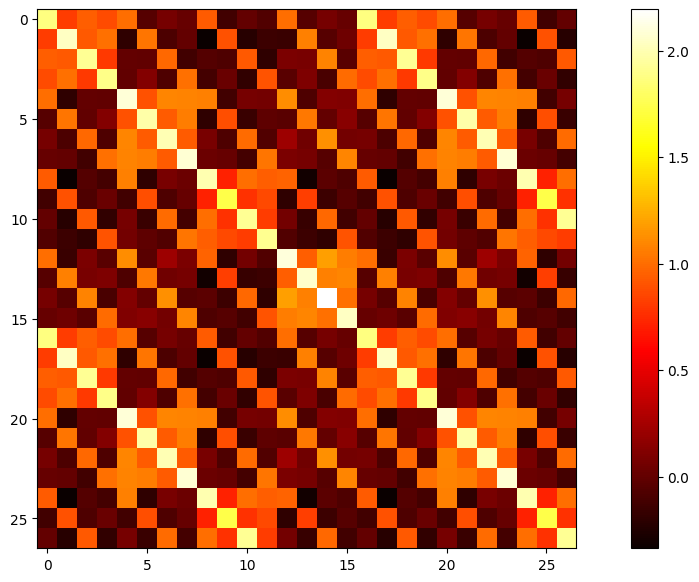

In [405]:
import random
start = random.randint(0,1000000)
id = torch.arange( 27)
parameters = torch.load("./output/345mixdata/epoch_100.pt")
tups = [ (1,3),(3,3),(9,3),(1,4),(4,4),(1,5),(5,5)]
index = [3,4]
tups = [ tups[i] for i in index]
pe_parameters = [parameters[f"position_embedding.embeddings.{i}.weight"] for i in index]
pe_parameters = [ pa/torch.norm(pa,dim=-1,keepdim=True) for pa in pe_parameters]
#pe_parameters = [nn.Embedding(numbers[i],256) for i in range(7)]
id_list = [ id//a%b for a,b in tups ]
pe_list = [pe[id] for id,pe in zip(id_list,pe_parameters)]
pe = sum(pe_list)
display(pe.shape)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
draw_hot(pe.cpu().detach())
#plt.imshow( pe.cpu() ,cmap="hot")
#plt.xlabel("q")
#plt.ylabel("k")
#plt.colorbar()

torch.Size([120, 256])

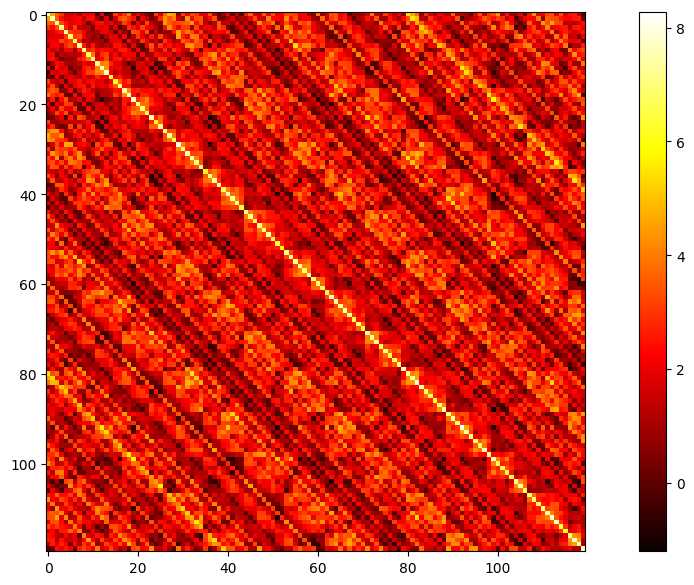

In [395]:
import random
start = random.randint(0,1000000)
id = torch.arange(start ,start + 120)
parameters = torch.load("./output/345mixdata/epoch_100.pt")
pe_parameters = [parameters[f"position_embedding.embeddings.{i}.weight"] for i in range(7)]
pe_parameters = [ pa/torch.norm(pa,dim=-1,keepdim=True) for pa in pe_parameters]
numbers = [3,3,3,4,4,5,5]
#pe_parameters = [nn.Embedding(numbers[i],256) for i in range(7)]
id_list = [ id%3 , id//3 %3 , id//9 %3  , id%4 , id//4%4 , id%5 , id//5%5 ]
pe_list = [pe[id] for id,pe in zip(id_list,pe_parameters)]
pe = sum(pe_list)
display(pe.shape)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
draw_hot(pe.cpu().detach())
#plt.imshow( pe.cpu() ,cmap="hot")
#plt.xlabel("q")
#plt.ylabel("k")
#plt.colorbar()

torch.Size([120, 256])

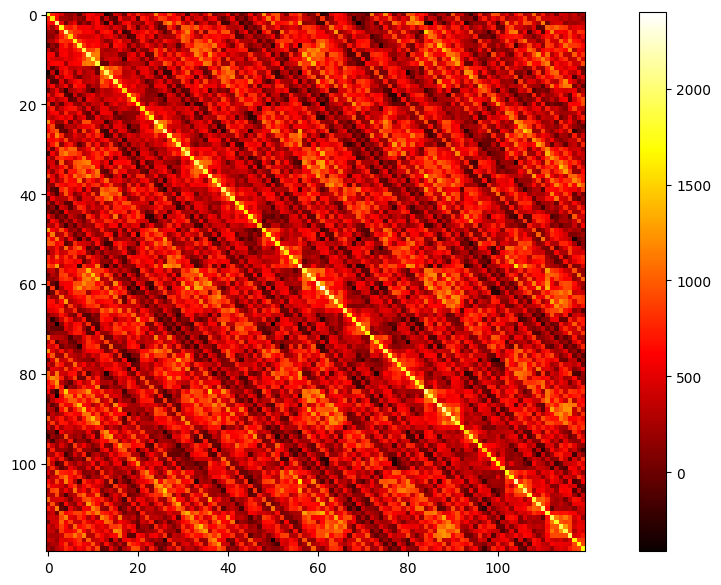

In [90]:
import random
start = random.randint(0,1000000)
id = torch.arange(start ,start + 120)
parameters = torch.load("./output/345mixdata/epoch_100.pt")
#pe_parameters = [parameters[f"position_embedding.embeddings.{i}.weight"] for i in range(7)]
numbers = [3,3,3,4,4,5,5]
pe_parameters = [nn.Embedding(numbers[i],256) for i in range(7)]
id_list = [ id%3 , id//3 %3 , id//9 %3  , id%4 , id//4%4 , id%5 , id//5%5 ]
pe_list = [pe(id) for id,pe in zip(id_list,pe_parameters)]
pe = sum(pe_list)
display(pe.shape)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
draw_hot(pe.cpu().detach())
#plt.imshow( pe.cpu() ,cmap="hot")
#plt.xlabel("q")
#plt.ylabel("k")
#plt.colorbar()

In [36]:
parameters = torch.load("./output/345mixdata/epoch_100.pt")
display({ n:para.shape for n,para in parameters.items() })
kw = parameters["h.0.attn.c_attn.weight"][:256]
kb = parameters["h.0.attn.c_attn.bias"][:256]
qw = parameters["h.0.attn.c_attn.weight"][256:512]
qb = parameters["h.0.attn.c_attn.bias"][256:512]

{'token_embedding.token_emb.weight': torch.Size([64, 256]),
 'token_embedding.norm.weight': torch.Size([256]),
 'token_embedding.norm.bias': torch.Size([256]),
 'position_embedding.embeddings.0.weight': torch.Size([3, 256]),
 'position_embedding.embeddings.1.weight': torch.Size([3, 256]),
 'position_embedding.embeddings.2.weight': torch.Size([3, 256]),
 'position_embedding.embeddings.3.weight': torch.Size([4, 256]),
 'position_embedding.embeddings.4.weight': torch.Size([4, 256]),
 'position_embedding.embeddings.5.weight': torch.Size([5, 256]),
 'position_embedding.embeddings.6.weight': torch.Size([5, 256]),
 'position_embedding.norm.weight': torch.Size([256]),
 'position_embedding.norm.bias': torch.Size([256]),
 'h.0.ln_1.weight': torch.Size([256]),
 'h.0.ln_1.bias': torch.Size([256]),
 'h.0.attn.RPE': torch.Size([1, 4, 120, 120]),
 'h.0.attn.bias': torch.Size([1, 1, 120, 120]),
 'h.0.attn.c_attn.weight': torch.Size([768, 256]),
 'h.0.attn.c_attn.bias': torch.Size([768]),
 'h.0.attn.c_

torch.Size([120, 256])

torch.Size([120, 256])

torch.Size([120, 256])

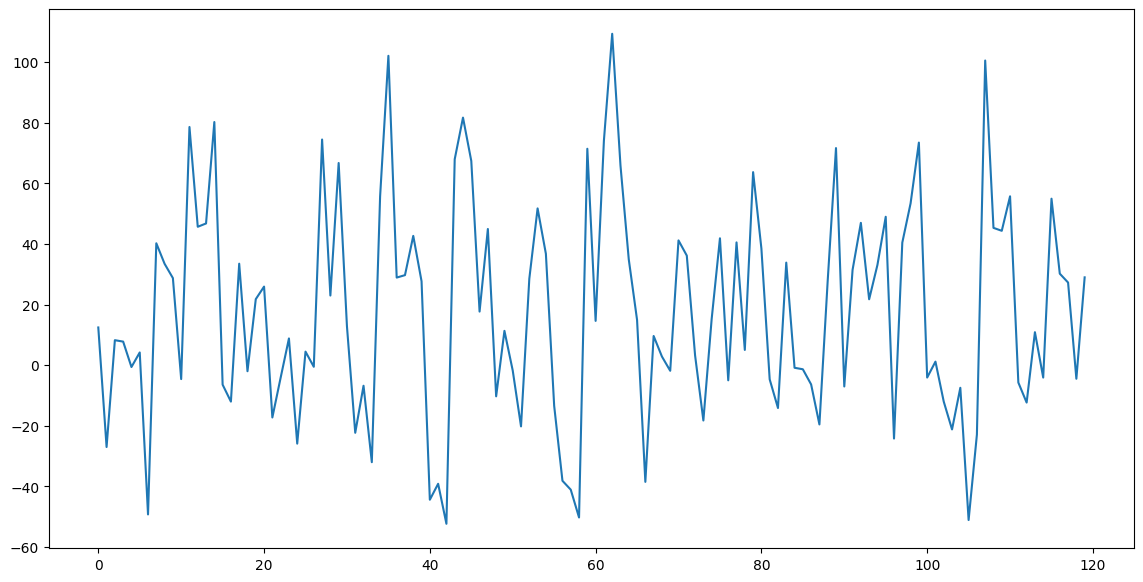

In [69]:
import random
start = random.randint(0,1000000)
id = torch.arange(start ,start + 120)
parameters = torch.load("./output/345mixdata/epoch_100.pt")
pe_parameters = [parameters[f"position_embedding.embeddings.{i}.weight"] for i in range(7)]
#display({ n:para.shape for n,para in parameters.items() })
numbers = [3,3,3,3,4,4,5,5]
id_list = [ id%3 , id//3 %3 , id//9 %3  , id%4 , id//4%4 , id%5 , id//5%5 ]
pe_list = [pe[id] for id,pe in zip(id_list,pe_parameters)]
#display([id.shape for id in id_list])
pe = sum(pe_list)
display(pe.shape)
plt.figure(figsize=(14,7))
k = pe@kw + kb
q = pe@qw + qb
import matplotlib.pyplot as plt
display(k.shape,q.shape)
att = (q @ k.T).cpu()
#plt.imshow( (q @ k.T).cpu() ,cmap="hot")
#plt.xlabel("q")
#plt.ylabel("k")
#plt.colorbar()
plt.plot(att[60])

torch.Size([120, 256])

torch.Size([120, 256])

torch.Size([120, 256])

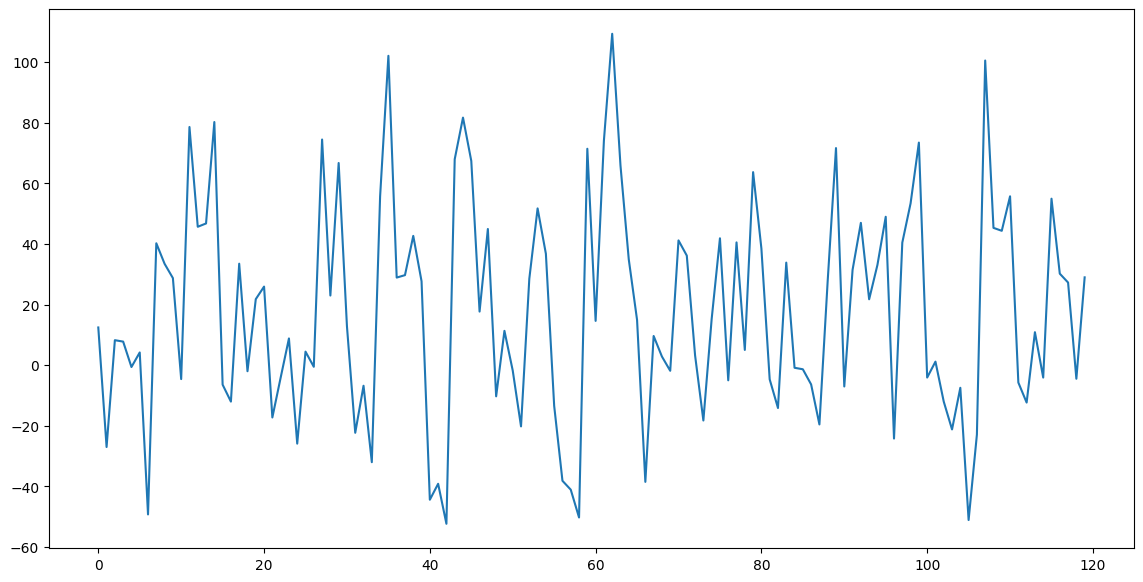

In [ ]:
import random
start = random.randint(0,1000000)
id = torch.arange(start ,start + 120)
parameters = torch.load("./output/345mixdata/epoch_100.pt")
pe_parameters = [parameters[f"position_embedding.embeddings.{i}.weight"] for i in range(7)]
#display({ n:para.shape for n,para in parameters.items() })
numbers = [3,3,3,3,4,4,5,5]
id_list = [ id%3 , id//3 %3 , id//9 %3  , id%4 , id//4%4 , id%5 , id//5%5 ]
pe_list = [pe[id] for id,pe in zip(id_list,pe_parameters)]
#display([id.shape for id in id_list])
pe = sum(pe_list)
display(pe.shape)
plt.figure(figsize=(14,7))
k = pe@kw + kb
q = pe@qw + qb
import matplotlib.pyplot as plt
display(k.shape,q.shape)
att = (q @ k.T).cpu()
#plt.imshow( (q @ k.T).cpu() ,cmap="hot")
#plt.xlabel("q")
#plt.ylabel("k")
#plt.colorbar()
plt.plot(att[60])

In [1]:
from my_token import tokens
print(tokens["g"])

27


In [11]:
import torch
 
# 示例布尔张量
bool_tensor = torch.tensor(
    [True, False, True,
    False, True, False,
    True, True, False])

 
# 获取为True的下标
true_indices = torch.nonzero(bool_tensor).reshape(-1).tolist()
 
print(true_indices)


[0, 2, 4, 6, 7]


In [248]:
a = torch.randn(3,2)
display(a)
display(a>0)
display(a<0.5)
b = (a>0) & (a<0.5)
b

tensor([[-0.5117,  0.5222],
        [ 0.5464,  0.1202],
        [-0.4124, -0.6344]])

tensor([[False,  True],
        [ True,  True],
        [False, False]])

tensor([[ True, False],
        [False,  True],
        [ True,  True]])

tensor([[False, False],
        [False,  True],
        [False, False]])

In [218]:
import torch
tensor_a = torch.tensor([1, 0, 1, 0], dtype=torch.bool)
tensor_b = torch.tensor([1, 1, 0, 0], dtype=torch.bool)
result = tensor_a & tensor_b
print(result)  # 输出: tensor([ True, False, False, False])


tensor([ True, False, False, False])


In [195]:

b,t,c = 3,4,5

logits = torch.randn(b,t,c)
start = torch.randint(0,t,(b,))
probs = F.softmax(logits[ torch.arange(b) ,start ])
action = torch.multinomial(probs , 1).reshape(-1)
display(logits)
display(start)
display(probs)
display(action)

C:\Users\86147\AppData\Local\Temp\ipykernel_29052\1174460734.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits[ torch.arange(b) ,start ])


tensor([[[-0.8241,  0.6221, -0.7088, -0.6441,  0.0717],
         [ 0.0100,  0.0437,  0.3515, -1.2201,  0.5882],
         [ 0.3930, -0.0391,  1.1131, -0.1161, -2.0523],
         [ 1.1292,  0.1249, -0.5847,  0.8307,  1.9098]],

        [[ 0.2049, -0.5753, -0.1458,  0.0179, -0.3077],
         [ 1.1843, -0.6849, -0.0486, -0.4283,  2.1421],
         [ 0.5586,  0.6219,  1.1231,  0.2712,  0.4918],
         [-1.6262, -0.0615,  0.3025, -0.5704,  0.0303]],

        [[-0.6410,  0.9265, -2.8346,  1.1151, -0.5113],
         [ 0.3999,  0.4028, -0.0589,  0.9252,  1.6117],
         [ 0.6156,  0.0787, -0.6413, -0.2685,  2.0229],
         [-1.1109, -0.2757, -0.4310, -0.8855, -1.4690]]])

tensor([2, 0, 0])

tensor([[0.2277, 0.1478, 0.4679, 0.1369, 0.0197],
        [0.2785, 0.1276, 0.1961, 0.2310, 0.1668],
        [0.0779, 0.3736, 0.0087, 0.4511, 0.0887]])

tensor([2, 4, 1])

In [190]:
a = torch.randint(0,2,(6,))
display(a)

tensor([1, 1, 0, 0, 0, 0])

In [193]:
b = torch.randn(6,4,5)

display(b)
display(b[a!=0])

tensor([[[-0.7911,  0.7544,  1.2548, -0.9019, -2.3025],
         [ 0.0665,  0.5084, -1.3542,  0.4693,  1.8966],
         [ 1.5784, -1.3409,  1.4044,  1.0266,  1.7042],
         [ 0.3366,  0.7559, -0.1477,  0.8411, -0.4127]],

        [[-0.1815, -0.6627,  1.1498,  0.6204, -1.6305],
         [-0.0880,  1.6431,  0.3100,  0.1108, -0.5766],
         [ 0.4635, -0.9958, -0.5092, -1.1634, -0.7583],
         [-0.1662, -1.4178, -0.1983, -0.4395,  0.9829]],

        [[ 0.6280, -0.1178, -0.3970, -0.0746, -1.0695],
         [-1.5502,  0.3385,  1.2305, -0.7547, -0.5469],
         [-0.1984, -1.3057,  1.0124, -0.1783,  0.6214],
         [ 0.7793, -0.8117, -2.3972,  0.1566, -1.5163]],

        [[-0.0483,  1.1251,  0.5432, -0.6924,  0.4712],
         [-1.5699, -0.7928,  0.5886, -3.0388, -0.8253],
         [ 1.9669, -0.0773,  0.5729, -0.1885, -1.9719],
         [ 1.0586, -0.5032,  0.6802, -0.6041, -1.2137]],

        [[ 0.6301,  0.1900,  0.8957, -1.5262, -1.6579],
         [-1.0516, -2.0711, -1.7195,  1.

tensor([[[-0.7911,  0.7544,  1.2548, -0.9019, -2.3025],
         [ 0.0665,  0.5084, -1.3542,  0.4693,  1.8966],
         [ 1.5784, -1.3409,  1.4044,  1.0266,  1.7042],
         [ 0.3366,  0.7559, -0.1477,  0.8411, -0.4127]],

        [[-0.1815, -0.6627,  1.1498,  0.6204, -1.6305],
         [-0.0880,  1.6431,  0.3100,  0.1108, -0.5766],
         [ 0.4635, -0.9958, -0.5092, -1.1634, -0.7583],
         [-0.1662, -1.4178, -0.1983, -0.4395,  0.9829]]])

In [113]:

a = torch.randn( 1200000 ,dtype=float)
a = a.reshape(-1,4,20)
#display(a)
a = F.softmax(a,dim=-1)

In [132]:
#display(F.softmax(a,dim=-1))
indices = torch.multinomial(a.reshape( -1,a.shape[-1] ),num_samples = 1)
#display(indices)
print( a.reshape( -1,a.shape[-1]).gather(1,indices) )

tensor([[0.0621],
        [0.1123],
        [0.0310],
        ...,
        [0.0242],
        [0.1245],
        [0.0568]], dtype=torch.float64)
